In [82]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

path_US = 'Desktop/Data/tl_2017_us_state/tl_2017_us_state.shp'
us = gpd.read_file(path_US)
us

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62265662566,489840834,+38.6472854,-080.6183274,"POLYGON ((-81.747254 39.095379, -81.746354 39.096578, -81.74625399999999 39.096878, -81.746054 3..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138911437206,31398800291,+28.4574302,-082.4091478,"(POLYGON ((-82.987477 24.625379, -82.987477 24.62543, -82.985529 24.640485, -82.97773599999999 2..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143784114293,6211277447,+40.1028754,-089.1526108,"POLYGON ((-91.185295 40.637803, -91.1751 40.643027, -91.163471 40.648925, -91.15912 40.651139, -..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206229176104,18944967530,+46.3158148,-094.1996628,"POLYGON ((-96.784381 46.63050399999999, -96.78433699999999 46.630526, -96.78420199999999 46.6305..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25150696145,6980371026,+38.9466584,-076.6744939,"POLYGON ((-77.45880799999999 39.22027, -77.45866099999999 39.220504, -77.45866099999999 39.22053..."
5,1,1,44,01219835,44,RI,Rhode Island,00,G4000,A,2677997539,1323452846,+41.5974187,-071.5272723,"(POLYGON ((-71.67880699999999 41.158912, -71.676264 41.168864, -71.67380799999999 41.17885, -71...."
6,4,8,16,01779783,16,ID,Idaho,00,G4000,A,214048160737,2393355752,+44.3484222,-114.5588538,"POLYGON ((-116.899711 44.840609, -116.89967 44.840655, -116.899611 44.840726, -116.899551 44.840..."
7,1,1,33,01779794,33,NH,New Hampshire,00,G4000,A,23187445452,1028643155,+43.6726907,-071.5843145,"POLYGON ((-72.329899 43.600214, -72.329838 43.60023, -72.329182 43.600451, -72.329032 43.600522,..."
8,3,5,37,01027616,37,NC,North Carolina,00,G4000,A,125919712692,13470113896,+35.5397100,-079.1308636,"POLYGON ((-82.416738 36.072827, -82.416601 36.073029, -82.41654199999999 36.073117, -82.41634599..."
9,1,1,50,01779802,50,VT,Vermont,00,G4000,A,23873457570,1031134839,+44.0604795,-072.6733274,"POLYGON ((-73.313283 44.26413, -73.312741 44.265411, -73.31197499999999 44.269139, -73.310914 44..."


In [83]:
us.crs

{'init': 'epsg:4269'}

In [84]:
path = 'Desktop/Data/ClimateChangeUS/NPSpecies_Checklist_ACAD_20190311_210132.csv'
df = gpd.read_file(path)
df.head()

,Park Code,Category,Order,Family,Taxa Code,Scientific Name,Synonyms,Common Name,Occurrence,Occurrence Tags,geometry
0,ACAD,Mammal,Artiodactyla,Cervidae,95052,Alces alces,,Moose,Present,,None
1,ACAD,Mammal,Artiodactyla,Cervidae,95046,Odocoileus virginianus,,"Northern White-tailed Deer, Virginia Deer, White-tailed Deer",Present,,None
2,ACAD,Mammal,Carnivora,Canidae,93340,Canis latrans,,"Coyote, Eastern Coyote",Present,,None
3,ACAD,Mammal,Carnivora,Canidae,93347,Vulpes vulpes,,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Red Fox, Silver Fox",Present,,None
4,ACAD,Mammal,Carnivora,Mustelidae,93311,Lutra canadensis,,"Otter, River Otter",Present,,None


In [85]:
g = df.groupby('Category')
g['Scientific Name'].count()

Category
Amphibian          11
Bird              215
Fish               33
Mammal             37
Reptile             7
Vascular Plant    866
Name: Scientific Name, dtype: int64

In [86]:
reptilesACAD = g.get_group('Reptile')
reptilesACAD

,Park Code,Category,Order,Family,Taxa Code,Scientific Name,Synonyms,Common Name,Occurrence,Occurrence Tags,geometry
252,ACAD,Reptile,Squamata,Colubridae,79719,Diadophis punctatus,,"Northern Ringneck Snake, Ringneck Snake, Ring-necked Snake",Present,,None
253,ACAD,Reptile,Squamata,Colubridae,79751,Lampropeltis triangulum,,"Eastern Milk Snake, Milk Snake, Northern Milk Snake, Spotted Adder",Present,,None
254,ACAD,Reptile,Squamata,Colubridae,289198,Liochlorophis vernalis,,"Eastern Smooth Green Snake, Smooth Green Snake, Smooth-scaled Green Snake",Present,,None
255,ACAD,Reptile,Squamata,Colubridae,79020,Storeria occipitomaculata,,"Red-bellied Snake, Redbelly Snake",Present,,None
256,ACAD,Reptile,Squamata,Colubridae,79025,Thamnophis sirtalis,,"Common Garter Snake, Eastern Garter Snake, Garter Snake",Present,,None
257,ACAD,Reptile,Testudines,Chelydridae,76856,Chelydra serpentina,,"Common Snapping Turtle, Snapping Turtle",Present,,None
258,ACAD,Reptile,Testudines,Emydidae,76890,Chrysemys picta,,"Central Painted Turtle, Eastern Painted Turtle, Midland Painted Turtle, Painted Turtle",Present,,None


In [87]:
path_RNSN = 'Desktop/Data/ClimateChangeUS/ACADreptiles/Ring_neckedSnak/rRNSNx_CONUS_Range_2001v1/rRNSNx_CONUS_Range_2001v1.shp'
Diadophis_punctatus = gpd.read_file(path_RNSN) # Ringneck snake
Diadophis_punctatus

,SeasonCode,SeasonName,species_id,present,geometry
0,1,Year-round,RNSN,1,"(POLYGON ((267930.8438000022 827515.1875000003, 268155.8125000005 827420.3750000001, 268239.9688..."


In [88]:
Diadophis_punctatus.crs

{'init': 'epsg:5070'}

In [89]:
# Change crs of Diadophis punctatus to match crs of basemap.
Diadophis_punctatus = Diadophis_punctatus.to_crs({'init': 'epsg:4269'})
Diadophis_punctatus.crs

{'init': 'epsg:4269'}

In [90]:
path_MILK = 'Desktop/Data/ClimateChangeUS/ACADreptiles/Milksnake_Lampr/rMILKx_CONUS_Range_2001v1/rMILKx_CONUS_Range_2001v1.shp'
Lampropeltis_triangulum = gpd.read_file(path_MILK) # Milksnake
Lampropeltis_triangulum

,SeasonCode,SeasonName,species_id,present,geometry
0,1,Year-round,MILK,1,"(POLYGON ((-1482813.250000001 1452020.625000001, -1482763.499999999 1452007.75, -1482728.5000000..."


In [91]:
Lampropeltis_triangulum = Lampropeltis_triangulum.to_crs({'init': 'epsg:4269'})
Lampropeltis_triangulum.crs

{'init': 'epsg:4269'}

In [92]:
path_SMGR = 'Desktop/Data/ClimateChangeUS/ACADreptiles/SmoothGreensnak/rSMGRx_CONUS_Range_2001v1/rSMGRx_CONUS_Range_2001v1.shp'
Liochlorophis_vernalis = gpd.read_file(path_SMGR) # Smooth greensnake
Liochlorophis_vernalis

,SeasonCode,SeasonName,species_id,present,geometry
0,1,Year-round,SMGR,1,"(POLYGON ((168351.5781000014 785652.5625000019, 168718.2343999988 784506.9374999986, 169000.9530..."


In [93]:
Liochlorophis_vernalis = Liochlorophis_vernalis.to_crs({'init': 'epsg:4269'})
Liochlorophis_vernalis.crs

{'init': 'epsg:4269'}

In [94]:
path_RBSN = 'Desktop/Data/ClimateChangeUS/ACADreptiles/Red_belliedSnak/rRBSNx_CONUS_Range_2001v1/rRBSNx_CONUS_Range_2001v1.shp'
Storeria_occipitomaculata = gpd.read_file(path_RBSN) # Red-bellied snake
Storeria_occipitomaculata

,SeasonCode,SeasonName,species_id,present,geometry
0,1,Year-round,RBSN,1,"(POLYGON ((271125.6563000001 1941408.375000001, 271195.5000000009 1941386.749999999, 271252.4374..."


In [95]:
Storeria_occipitomaculata = Storeria_occipitomaculata.to_crs({'init': 'epsg:4269'})
Storeria_occipitomaculata.crs

{'init': 'epsg:4269'}

In [96]:
path_COGA = 'Desktop/Data/ClimateChangeUS/ACADreptiles/CommonGartersna/rCOGAx_CONUS_Range_2001v1/rCOGAx_CONUS_Range_2001v1.shp'
Thamnophis_sirtalis = gpd.read_file(path_COGA) # Common garter snake
Thamnophis_sirtalis

,SeasonCode,SeasonName,species_id,present,geometry
0,1,Year-round,COGA,1,"(POLYGON ((-957364.5625000007 1157704.500000001, -957232.4375000002 1157700.124999998, -957016.2..."


In [97]:
Thamnophis_sirtalis = Thamnophis_sirtalis.to_crs({'init': 'epsg:4269'})
Thamnophis_sirtalis.crs

{'init': 'epsg:4269'}

In [98]:
path_SNTU = 'Desktop/Data/ClimateChangeUS/ACADreptiles/SnappingTurtle_/rSNTUx_CONUS_Range_2001v1/rSNTUx_CONUS_Range_2001v1.shp'
Chelydra_serpentina = gpd.read_file(path_SNTU) # Snapping turtle
Chelydra_serpentina

,SeasonCode,SeasonName,species_id,present,geometry
0,1,Year-round,SNTU,1.0,"(POLYGON ((-858093.3749999986 2232516.5, -857795.3125 2232379.499999999, -857482.7499999988 2232..."
1,1,Year-round,SNTU,NaN,"(POLYGON ((-1507229.249999999 1345656.375000001, -1507205.249999999 1345645.375000001, -1507174...."


In [99]:
Chelydra_serpentina = Chelydra_serpentina.to_crs({'init': 'epsg:4269'})
Chelydra_serpentina.crs

{'init': 'epsg:4269'}

In [100]:
Chelydra_serpentina['geometry']

0    (POLYGON ((-106.5519135295398 42.66105276792974, -106.5480920884029 42.66012999406549, -106.5443...
1    (POLYGON ((-112.5194655697712 33.994178863031, -112.5191870463397 33.99411906059619, -112.518861...
Name: geometry, dtype: object

In [101]:
# Save each row of original Chelydra serpentina table under separate name.
Chelydra_serpentina1 = Chelydra_serpentina.iloc[0]
Chelydra_serpentina1

SeasonCode                                                                                                      1
SeasonName                                                                                             Year-round
species_id                                                                                                   SNTU
present                                                                                                         1
geometry      (POLYGON ((-106.5519135295398 42.66105276792974, -106.5480920884029 42.66012999406549, -106.5443...
Name: 0, dtype: object

In [102]:
type(Chelydra_serpentina1)

pandas.core.series.Series

In [103]:
Chelydra_serpentina2 = Chelydra_serpentina.iloc[1]
Chelydra_serpentina2

SeasonCode                                                                                                      1
SeasonName                                                                                             Year-round
species_id                                                                                                   SNTU
present                                                                                                       NaN
geometry      (POLYGON ((-112.5194655697712 33.994178863031, -112.5191870463397 33.99411906059619, -112.518861...
Name: 1, dtype: object

In [104]:
# Modify species_id to distinguish sections of range.
Chelydra_serpentina['species_id'].iloc[1] = 'SNTU2'
Chelydra_serpentina

,SeasonCode,SeasonName,species_id,present,geometry
0,1,Year-round,SNTU,1.0,"(POLYGON ((-106.5519135295398 42.66105276792974, -106.5480920884029 42.66012999406549, -106.5443..."
1,1,Year-round,SNTU2,NaN,"(POLYGON ((-112.5194655697712 33.994178863031, -112.5191870463397 33.99411906059619, -112.518861..."


In [105]:
Chelydra_serpentina['species_id'].iloc[0] = 'SNTU1'
Chelydra_serpentina

,SeasonCode,SeasonName,species_id,present,geometry
0,1,Year-round,SNTU1,1.0,"(POLYGON ((-106.5519135295398 42.66105276792974, -106.5480920884029 42.66012999406549, -106.5443..."
1,1,Year-round,SNTU2,NaN,"(POLYGON ((-112.5194655697712 33.994178863031, -112.5191870463397 33.99411906059619, -112.518861..."


In [106]:
Chelydra_serpentina['present'].iloc[1] = 1
Chelydra_serpentina

,SeasonCode,SeasonName,species_id,present,geometry
0,1,Year-round,SNTU1,1.0,"(POLYGON ((-106.5519135295398 42.66105276792974, -106.5480920884029 42.66012999406549, -106.5443..."
1,1,Year-round,SNTU2,1.0,"(POLYGON ((-112.5194655697712 33.994178863031, -112.5191870463397 33.99411906059619, -112.518861..."


In [107]:
path_PATU = 'Desktop/Data/ClimateChangeUS/ACADreptiles/PaintedTurtle_C/rPATUx_CONUS_Range_2001v1/rPATUx_CONUS_Range_2001v1.shp'
Chrysemys_picta = gpd.read_file(path_PATU) # Painted turtle
Chrysemys_picta

,SeasonCode,SeasonName,species_id,present,geometry
0,1,Year-round,PATU,1.0,"(POLYGON ((-1363987.125 1023027.500000001, -1364060.500000002 1022703.9375, -1364315.749999998 1..."
1,1,Year-round,PATU,NaN,"(POLYGON ((-99687.64839999937 849712.1875000009, -99531.75780000212 849617.9374999986, -99392.49..."


In [108]:
Chrysemys_picta = Chrysemys_picta.to_crs({'init': 'epsg:4269'})
Chrysemys_picta.crs

{'init': 'epsg:4269'}

In [109]:
# Assign unique id to each section of species range.
Chrysemys_picta['species_id'].iloc[0] = 'PATU1'
Chrysemys_picta['species_id'].iloc[1] = 'PATU2'
Chrysemys_picta

,SeasonCode,SeasonName,species_id,present,geometry
0,1,Year-round,PATU1,1.0,"(POLYGON ((-110.4426102675805 31.3480175047059, -110.4428586082618 31.34504364880682, -110.44461..."
1,1,Year-round,PATU2,NaN,"(POLYGON ((-97.04339916257852 30.7184506695733, -97.04175682222299 30.71761810624655, -97.040302..."


In [110]:
Chrysemys_picta['present'].iloc[1] = 1
Chrysemys_picta

,SeasonCode,SeasonName,species_id,present,geometry
0,1,Year-round,PATU1,1.0,"(POLYGON ((-110.4426102675805 31.3480175047059, -110.4428586082618 31.34504364880682, -110.44461..."
1,1,Year-round,PATU2,1.0,"(POLYGON ((-97.04339916257852 30.7184506695733, -97.04175682222299 30.71761810624655, -97.040302..."


In [111]:
# Create DataFrame of several points in Maine.
points_df = pd.DataFrame(
    {'points': ['pt1', 'pt2', 'pt3', 'pt4', 'pt5', 'pt6'],
    'Latitude': [44, 45, 45, 45, 46, 46],
    'Longitude': [-69, -68, -69, -70, -69, -68]})

In [112]:
from shapely.geometry import Point, Polygon
points_geometry = [Point(xy) for xy in zip(points_df["Longitude"], points_df["Latitude"])]
points_geometry

In [113]:
points_gdf = gpd.GeoDataFrame(
    points_df, crs={'init': 'epsg:4269'}, geometry=points_geometry)
points_gdf

,points,Latitude,Longitude,geometry
0,pt1,44,-69,POINT (-69 44)
1,pt2,45,-68,POINT (-68 45)
2,pt3,45,-69,POINT (-69 45)
3,pt4,45,-70,POINT (-70 45)
4,pt5,46,-69,POINT (-69 46)
5,pt6,46,-68,POINT (-68 46)


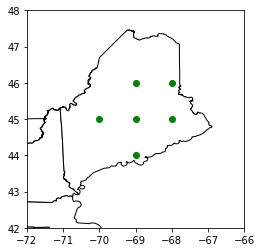

In [114]:
# Check to make sure points plot correctly.
fig, ax = plt.subplots()
ax.set(xlim=(-72,-66), ylim=(42,48)) # Narrow limits because focus will be on Maine.
us.plot(figsize=(10,8), ax=ax, color='white', edgecolor='black')
points_gdf.plot(ax=ax, color='green')

In [115]:
# Merge Diadophis_punctatus multipolygon with the points in points_gdf
temp_pts_gdf = gpd.sjoin(points_gdf, Diadophis_punctatus, how='left', op='intersects')
temp_pts_gdf

,points,Latitude,Longitude,geometry,index_right,SeasonCode,SeasonName,species_id,present
0,pt1,44,-69,POINT (-69 44),0,1,Year-round,RNSN,1
1,pt2,45,-68,POINT (-68 45),0,1,Year-round,RNSN,1
2,pt3,45,-69,POINT (-69 45),0,1,Year-round,RNSN,1
3,pt4,45,-70,POINT (-70 45),0,1,Year-round,RNSN,1
4,pt5,46,-69,POINT (-69 46),0,1,Year-round,RNSN,1
5,pt6,46,-68,POINT (-68 46),0,1,Year-round,RNSN,1


In [116]:
temp_pts_gdf2 = gpd.sjoin(points_gdf, Lampropeltis_triangulum, how='left', op='intersects')
temp_pts_gdf2

,points,Latitude,Longitude,geometry,index_right,SeasonCode,SeasonName,species_id,present
0,pt1,44,-69,POINT (-69 44),0.0,1.0,Year-round,MILK,1.0
1,pt2,45,-68,POINT (-68 45),NaN,NaN,NaN,NaN,NaN
2,pt3,45,-69,POINT (-69 45),0.0,1.0,Year-round,MILK,1.0
3,pt4,45,-70,POINT (-70 45),NaN,NaN,NaN,NaN,NaN
4,pt5,46,-69,POINT (-69 46),NaN,NaN,NaN,NaN,NaN
5,pt6,46,-68,POINT (-68 46),NaN,NaN,NaN,NaN,NaN


In [117]:
temp_pts_gdf3 = gpd.sjoin(points_gdf, Liochlorophis_vernalis, how='left', op='intersects')
temp_pts_gdf3

,points,Latitude,Longitude,geometry,index_right,SeasonCode,SeasonName,species_id,present
0,pt1,44,-69,POINT (-69 44),NaN,NaN,NaN,NaN,NaN
1,pt2,45,-68,POINT (-68 45),0.0,1.0,Year-round,SMGR,1.0
2,pt3,45,-69,POINT (-69 45),0.0,1.0,Year-round,SMGR,1.0
3,pt4,45,-70,POINT (-70 45),0.0,1.0,Year-round,SMGR,1.0
4,pt5,46,-69,POINT (-69 46),0.0,1.0,Year-round,SMGR,1.0
5,pt6,46,-68,POINT (-68 46),0.0,1.0,Year-round,SMGR,1.0


In [118]:
temp_pts_gdf4 = gpd.sjoin(points_gdf, Storeria_occipitomaculata, how='left', op='intersects')
temp_pts_gdf4

,points,Latitude,Longitude,geometry,index_right,SeasonCode,SeasonName,species_id,present
0,pt1,44,-69,POINT (-69 44),0,1,Year-round,RBSN,1
1,pt2,45,-68,POINT (-68 45),0,1,Year-round,RBSN,1
2,pt3,45,-69,POINT (-69 45),0,1,Year-round,RBSN,1
3,pt4,45,-70,POINT (-70 45),0,1,Year-round,RBSN,1
4,pt5,46,-69,POINT (-69 46),0,1,Year-round,RBSN,1
5,pt6,46,-68,POINT (-68 46),0,1,Year-round,RBSN,1


In [119]:
temp_pts_gdf5 = gpd.sjoin(points_gdf, Thamnophis_sirtalis, how='left', op='intersects')
temp_pts_gdf5

,points,Latitude,Longitude,geometry,index_right,SeasonCode,SeasonName,species_id,present
0,pt1,44,-69,POINT (-69 44),0,1,Year-round,COGA,1
1,pt2,45,-68,POINT (-68 45),0,1,Year-round,COGA,1
2,pt3,45,-69,POINT (-69 45),0,1,Year-round,COGA,1
3,pt4,45,-70,POINT (-70 45),0,1,Year-round,COGA,1
4,pt5,46,-69,POINT (-69 46),0,1,Year-round,COGA,1
5,pt6,46,-68,POINT (-68 46),0,1,Year-round,COGA,1


In [120]:
temp_pts_gdf6 = gpd.sjoin(points_gdf, Chelydra_serpentina, how='left', op='intersects')
temp_pts_gdf6

,points,Latitude,Longitude,geometry,index_right,SeasonCode,SeasonName,species_id,present
0,pt1,44,-69,POINT (-69 44),0,1,Year-round,SNTU1,1.0
1,pt2,45,-68,POINT (-68 45),0,1,Year-round,SNTU1,1.0
2,pt3,45,-69,POINT (-69 45),0,1,Year-round,SNTU1,1.0
3,pt4,45,-70,POINT (-70 45),0,1,Year-round,SNTU1,1.0
4,pt5,46,-69,POINT (-69 46),0,1,Year-round,SNTU1,1.0
5,pt6,46,-68,POINT (-68 46),0,1,Year-round,SNTU1,1.0


In [121]:
temp_pts_gdf7 = gpd.sjoin(points_gdf, Chrysemys_picta, how='left', op='intersects')
temp_pts_gdf7

,points,Latitude,Longitude,geometry,index_right,SeasonCode,SeasonName,species_id,present
0,pt1,44,-69,POINT (-69 44),0.0,1.0,Year-round,PATU1,1.0
1,pt2,45,-68,POINT (-68 45),0.0,1.0,Year-round,PATU1,1.0
2,pt3,45,-69,POINT (-69 45),0.0,1.0,Year-round,PATU1,1.0
3,pt4,45,-70,POINT (-70 45),NaN,NaN,NaN,NaN,NaN
4,pt5,46,-69,POINT (-69 46),NaN,NaN,NaN,NaN,NaN
5,pt6,46,-68,POINT (-68 46),NaN,NaN,NaN,NaN,NaN


In [122]:
pts_dataFrames_list = [temp_pts_gdf, temp_pts_gdf2, temp_pts_gdf3, temp_pts_gdf4, temp_pts_gdf5, temp_pts_gdf6,
                      temp_pts_gdf7]
# Concatenate dataFrames to get total number of species overlapping each point.
new_pts_gdf = pd.concat(pts_dataFrames_list)
new_pts_gdf

,points,Latitude,Longitude,geometry,index_right,SeasonCode,SeasonName,species_id,present
0,pt1,44,-69,POINT (-69 44),0.0,1.0,Year-round,RNSN,1.0
1,pt2,45,-68,POINT (-68 45),0.0,1.0,Year-round,RNSN,1.0
2,pt3,45,-69,POINT (-69 45),0.0,1.0,Year-round,RNSN,1.0
3,pt4,45,-70,POINT (-70 45),0.0,1.0,Year-round,RNSN,1.0
4,pt5,46,-69,POINT (-69 46),0.0,1.0,Year-round,RNSN,1.0
5,pt6,46,-68,POINT (-68 46),0.0,1.0,Year-round,RNSN,1.0
0,pt1,44,-69,POINT (-69 44),0.0,1.0,Year-round,MILK,1.0
1,pt2,45,-68,POINT (-68 45),NaN,NaN,NaN,NaN,NaN
2,pt3,45,-69,POINT (-69 45),0.0,1.0,Year-round,MILK,1.0
3,pt4,45,-70,POINT (-70 45),NaN,NaN,NaN,NaN,NaN


In [123]:
type(new_pts_gdf)

geopandas.geodataframe.GeoDataFrame

In [124]:
by_pt = new_pts_gdf.groupby('points')
by_pt

In [125]:
# Print all the dataFrames grouped by point
for pt, pt_df in by_pt:
    print(pt)
    print(pt_df)

pt1
  points  Latitude  Longitude        geometry  index_right  SeasonCode  \
0    pt1        44        -69  POINT (-69 44)          0.0         1.0   
0    pt1        44        -69  POINT (-69 44)          0.0         1.0   
0    pt1        44        -69  POINT (-69 44)          NaN         NaN   
0    pt1        44        -69  POINT (-69 44)          0.0         1.0   
0    pt1        44        -69  POINT (-69 44)          0.0         1.0   
0    pt1        44        -69  POINT (-69 44)          0.0         1.0   
0    pt1        44        -69  POINT (-69 44)          0.0         1.0   

   SeasonName species_id  present  
0  Year-round       RNSN      1.0  
0  Year-round       MILK      1.0  
0         NaN        NaN      NaN  
0  Year-round       RBSN      1.0  
0  Year-round       COGA      1.0  
0  Year-round      SNTU1      1.0  
0  Year-round      PATU1      1.0  
pt2
  points  Latitude  Longitude        geometry  index_right  SeasonCode  \
1    pt2        45        -68  POINT 

In [126]:
# Add total number of reptile species present at each point and save as variable.
reptiles_total_species2 = by_pt['present'].sum()
reptiles_total_species2

points
pt1    6.0
pt2    6.0
pt3    7.0
pt4    5.0
pt5    5.0
pt6    5.0
Name: present, dtype: float64

In [127]:
type(reptiles_total_species2)

pandas.core.series.Series

In [128]:
species_perPoint = reptiles_total_species2.to_frame()
species_perPoint

,present
points,
pt1,6.0
pt2,6.0
pt3,7.0
pt4,5.0
pt5,5.0
pt6,5.0


In [129]:
type(species_perPoint['present'].iloc[0])

numpy.float64

In [130]:
species_perPoint.index

Index(['pt1', 'pt2', 'pt3', 'pt4', 'pt5', 'pt6'], dtype='object', name='points')

In [131]:
reptiles_total = species_perPoint['present'].tolist()
reptiles_total

[6.0, 6.0, 7.0, 5.0, 5.0, 5.0]

In [132]:
species_perPoint_new = pd.DataFrame(
    {'points': ['pt1', 'pt2', 'pt3', 'pt4', 'pt5', 'pt6'], 
     'reptiles_total': reptiles_total})
species_perPoint_new

,points,reptiles_total
0,pt1,6.0
1,pt2,6.0
2,pt3,7.0
3,pt4,5.0
4,pt5,5.0
5,pt6,5.0


In [133]:
points_gdf = points_gdf.merge(species_perPoint_new, on='points')
points_gdf

,points,Latitude,Longitude,geometry,reptiles_total
0,pt1,44,-69,POINT (-69 44),6.0
1,pt2,45,-68,POINT (-68 45),6.0
2,pt3,45,-69,POINT (-69 45),7.0
3,pt4,45,-70,POINT (-70 45),5.0
4,pt5,46,-69,POINT (-69 46),5.0
5,pt6,46,-68,POINT (-68 46),5.0


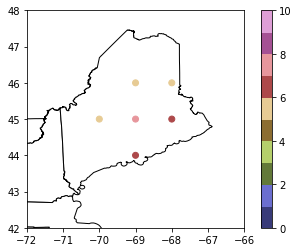

In [134]:
# Plot complete_gdf which contains ACAD centroid plus the additional points.
fig, ax = plt.subplots()
ax.set(xlim=(-72,-66), ylim=(42,48)) # Narrow limits because focus will be on Maine.
us.plot(figsize=(10,8), ax=ax, color='white', edgecolor='black')
points_gdf.plot(column='reptiles_total', ax=ax, cmap=plt.cm.get_cmap('tab20b', 10), legend=True, 
                       vmin=0, vmax=10)

In [135]:
# Get long values to set up grid of points spaced 0.1 degrees apart.
import numpy as np

def tenths_x(xmin, xmax):
    num_x = ((xmax - xmin) * 10) + 1
    x_values = np.linspace(xmin, xmax, num_x)
    return x_values

long_values = tenths_x(-72, -66)
long_values

array([-72. , -71.9, -71.8, -71.7, -71.6, -71.5, -71.4, -71.3, -71.2,
       -71.1, -71. , -70.9, -70.8, -70.7, -70.6, -70.5, -70.4, -70.3,
       -70.2, -70.1, -70. , -69.9, -69.8, -69.7, -69.6, -69.5, -69.4,
       -69.3, -69.2, -69.1, -69. , -68.9, -68.8, -68.7, -68.6, -68.5,
       -68.4, -68.3, -68.2, -68.1, -68. , -67.9, -67.8, -67.7, -67.6,
       -67.5, -67.4, -67.3, -67.2, -67.1, -67. , -66.9, -66.8, -66.7,
       -66.6, -66.5, -66.4, -66.3, -66.2, -66.1, -66. ])

In [136]:
# Get latitude values spaced 0.1 degrees apart to set up grid.
def tenths_y(ymin, ymax):
    num_y = ((ymax - ymin) * 10) + 1
    y_values = np.linspace(ymin, ymax, num_y)
    return y_values

lat_values = tenths_y(42, 48)
lat_values

array([42. , 42.1, 42.2, 42.3, 42.4, 42.5, 42.6, 42.7, 42.8, 42.9, 43. ,
       43.1, 43.2, 43.3, 43.4, 43.5, 43.6, 43.7, 43.8, 43.9, 44. , 44.1,
       44.2, 44.3, 44.4, 44.5, 44.6, 44.7, 44.8, 44.9, 45. , 45.1, 45.2,
       45.3, 45.4, 45.5, 45.6, 45.7, 45.8, 45.9, 46. , 46.1, 46.2, 46.3,
       46.4, 46.5, 46.6, 46.7, 46.8, 46.9, 47. , 47.1, 47.2, 47.3, 47.4,
       47.5, 47.6, 47.7, 47.8, 47.9, 48. ])

In [137]:
# The full array of long values will need to repeat for each lat value.
x_complete = np.repeat(long_values, len(lat_values))
print(x_complete)

[-72. -72. -72. ... -66. -66. -66.]


In [138]:
len(x_complete)

3721

In [139]:
# Tile the y array (i.e. lat values) so that full range of lat values get matched to each long value.
y_complete = np.tile(lat_values, len(long_values))
print(y_complete)

[42.  42.1 42.2 ... 47.8 47.9 48. ]


In [140]:
len(y_complete)

3721

In [141]:
grid = pd.DataFrame(
    {'longitude': x_complete,
    'latitude': y_complete})
grid.head(30)

,longitude,latitude
0,-72.0,42.0
1,-72.0,42.1
2,-72.0,42.2
3,-72.0,42.3
4,-72.0,42.4
5,-72.0,42.5
6,-72.0,42.6
7,-72.0,42.7
8,-72.0,42.8
9,-72.0,42.9


In [142]:
from shapely.geometry import Point

grid_geometry = [Point(x, y) for x, y in zip(grid['longitude'], grid['latitude'])]
grid_gdf = gpd.GeoDataFrame(
    grid, crs={'init': 'epsg:4269'}, geometry=grid_geometry)
grid_gdf.head(30)

,longitude,latitude,geometry
0,-72.0,42.0,POINT (-72 42)
1,-72.0,42.1,POINT (-72 42.1)
2,-72.0,42.2,POINT (-72 42.2)
3,-72.0,42.3,POINT (-72 42.3)
4,-72.0,42.4,POINT (-72 42.4)
5,-72.0,42.5,POINT (-72 42.5)
6,-72.0,42.6,POINT (-72 42.6)
7,-72.0,42.7,POINT (-72 42.7)
8,-72.0,42.8,POINT (-72 42.8)
9,-72.0,42.9,POINT (-72 42.9)


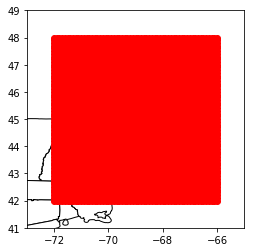

In [143]:
# Check to make sure points plot correctly.
fig, ax = plt.subplots()
ax.set(xlim=(-73,-65), ylim=(41,49)) # Broaden limits from previous to ensure all points are visible.
us.plot(figsize=(10,8), ax=ax, color='white', edgecolor='black')
grid_gdf.plot(ax=ax, color='red')

In [144]:
# Merge Diadophis_punctatus multipolygon with the points in points_gdf
temp_grid1_gdf = gpd.sjoin(grid_gdf, Diadophis_punctatus, how='left', op='intersects')
temp_grid1_gdf.head()

,longitude,latitude,geometry,index_right,SeasonCode,SeasonName,species_id,present
0,-72.0,42.0,POINT (-72 42),0.0,1.0,Year-round,RNSN,1.0
1,-72.0,42.1,POINT (-72 42.1),0.0,1.0,Year-round,RNSN,1.0
2,-72.0,42.2,POINT (-72 42.2),0.0,1.0,Year-round,RNSN,1.0
3,-72.0,42.3,POINT (-72 42.3),0.0,1.0,Year-round,RNSN,1.0
4,-72.0,42.4,POINT (-72 42.4),0.0,1.0,Year-round,RNSN,1.0


In [145]:
species_list = reptilesACAD['Scientific Name']
species_list

252          Diadophis punctatus
253      Lampropeltis triangulum
254       Liochlorophis vernalis
255    Storeria occipitomaculata
256          Thamnophis sirtalis
257          Chelydra serpentina
258              Chrysemys picta
Name: Scientific Name, dtype: object

In [146]:
temp_grid2_gdf = gpd.sjoin(grid_gdf, Lampropeltis_triangulum, how='left', op='intersects')
temp_grid2_gdf.head()

,longitude,latitude,geometry,index_right,SeasonCode,SeasonName,species_id,present
0,-72.0,42.0,POINT (-72 42),0.0,1.0,Year-round,MILK,1.0
1,-72.0,42.1,POINT (-72 42.1),0.0,1.0,Year-round,MILK,1.0
2,-72.0,42.2,POINT (-72 42.2),0.0,1.0,Year-round,MILK,1.0
3,-72.0,42.3,POINT (-72 42.3),0.0,1.0,Year-round,MILK,1.0
4,-72.0,42.4,POINT (-72 42.4),0.0,1.0,Year-round,MILK,1.0


In [147]:
temp_grid3_gdf = gpd.sjoin(grid_gdf, Liochlorophis_vernalis, how='left', op='intersects')
temp_grid3_gdf.head()

,longitude,latitude,geometry,index_right,SeasonCode,SeasonName,species_id,present
0,-72.0,42.0,POINT (-72 42),0.0,1.0,Year-round,SMGR,1.0
1,-72.0,42.1,POINT (-72 42.1),0.0,1.0,Year-round,SMGR,1.0
2,-72.0,42.2,POINT (-72 42.2),0.0,1.0,Year-round,SMGR,1.0
3,-72.0,42.3,POINT (-72 42.3),0.0,1.0,Year-round,SMGR,1.0
4,-72.0,42.4,POINT (-72 42.4),0.0,1.0,Year-round,SMGR,1.0


In [148]:
temp_grid4_gdf = gpd.sjoin(grid_gdf, Storeria_occipitomaculata, how='left', op='intersects')
temp_grid4_gdf.head()

,longitude,latitude,geometry,index_right,SeasonCode,SeasonName,species_id,present
0,-72.0,42.0,POINT (-72 42),0.0,1.0,Year-round,RBSN,1.0
1,-72.0,42.1,POINT (-72 42.1),0.0,1.0,Year-round,RBSN,1.0
2,-72.0,42.2,POINT (-72 42.2),0.0,1.0,Year-round,RBSN,1.0
3,-72.0,42.3,POINT (-72 42.3),0.0,1.0,Year-round,RBSN,1.0
4,-72.0,42.4,POINT (-72 42.4),0.0,1.0,Year-round,RBSN,1.0


In [149]:
temp_grid5_gdf = gpd.sjoin(grid_gdf, Thamnophis_sirtalis, how='left', op='intersects')
temp_grid5_gdf.head()

,longitude,latitude,geometry,index_right,SeasonCode,SeasonName,species_id,present
0,-72.0,42.0,POINT (-72 42),0.0,1.0,Year-round,COGA,1.0
1,-72.0,42.1,POINT (-72 42.1),0.0,1.0,Year-round,COGA,1.0
2,-72.0,42.2,POINT (-72 42.2),0.0,1.0,Year-round,COGA,1.0
3,-72.0,42.3,POINT (-72 42.3),0.0,1.0,Year-round,COGA,1.0
4,-72.0,42.4,POINT (-72 42.4),0.0,1.0,Year-round,COGA,1.0


In [150]:
temp_grid6_gdf = gpd.sjoin(grid_gdf, Chelydra_serpentina, how='left', op='intersects')
temp_grid6_gdf.head()

,longitude,latitude,geometry,index_right,SeasonCode,SeasonName,species_id,present
0,-72.0,42.0,POINT (-72 42),0.0,1.0,Year-round,SNTU1,1.0
1,-72.0,42.1,POINT (-72 42.1),0.0,1.0,Year-round,SNTU1,1.0
2,-72.0,42.2,POINT (-72 42.2),0.0,1.0,Year-round,SNTU1,1.0
3,-72.0,42.3,POINT (-72 42.3),0.0,1.0,Year-round,SNTU1,1.0
4,-72.0,42.4,POINT (-72 42.4),0.0,1.0,Year-round,SNTU1,1.0


In [151]:
temp_grid7_gdf = gpd.sjoin(grid_gdf, Chrysemys_picta, how='left', op='intersects')
temp_grid7_gdf.head()

,longitude,latitude,geometry,index_right,SeasonCode,SeasonName,species_id,present
0,-72.0,42.0,POINT (-72 42),0.0,1.0,Year-round,PATU1,1.0
1,-72.0,42.1,POINT (-72 42.1),0.0,1.0,Year-round,PATU1,1.0
2,-72.0,42.2,POINT (-72 42.2),0.0,1.0,Year-round,PATU1,1.0
3,-72.0,42.3,POINT (-72 42.3),0.0,1.0,Year-round,PATU1,1.0
4,-72.0,42.4,POINT (-72 42.4),0.0,1.0,Year-round,PATU1,1.0


In [152]:
temp_gdfs_list = [temp_grid1_gdf, temp_grid2_gdf, temp_grid3_gdf, temp_grid4_gdf, temp_grid5_gdf, temp_grid6_gdf, 
                  temp_grid7_gdf]
gdf_full = pd.concat(temp_gdfs_list)
gdf_full.head(10)

,longitude,latitude,geometry,index_right,SeasonCode,SeasonName,species_id,present
0,-72.0,42.0,POINT (-72 42),0.0,1.0,Year-round,RNSN,1.0
1,-72.0,42.1,POINT (-72 42.1),0.0,1.0,Year-round,RNSN,1.0
2,-72.0,42.2,POINT (-72 42.2),0.0,1.0,Year-round,RNSN,1.0
3,-72.0,42.3,POINT (-72 42.3),0.0,1.0,Year-round,RNSN,1.0
4,-72.0,42.4,POINT (-72 42.4),0.0,1.0,Year-round,RNSN,1.0
5,-72.0,42.5,POINT (-72 42.5),0.0,1.0,Year-round,RNSN,1.0
6,-72.0,42.6,POINT (-72 42.6),0.0,1.0,Year-round,RNSN,1.0
7,-72.0,42.7,POINT (-72 42.7),0.0,1.0,Year-round,RNSN,1.0
8,-72.0,42.8,POINT (-72 42.8),0.0,1.0,Year-round,RNSN,1.0
9,-72.0,42.9,POINT (-72 42.9),0.0,1.0,Year-round,RNSN,1.0


In [153]:
type(gdf_full['longitude'][0])

pandas.core.series.Series

In [154]:
gpd_full_grouped = pd.concat(temp_gdfs_list).groupby(['longitude', 'latitude'])

In [155]:
gpd_full_grouped.get_group((-72.0, 42.0))

,longitude,latitude,geometry,index_right,SeasonCode,SeasonName,species_id,present
0,-72.0,42.0,POINT (-72 42),0.0,1.0,Year-round,RNSN,1.0
0,-72.0,42.0,POINT (-72 42),0.0,1.0,Year-round,MILK,1.0
0,-72.0,42.0,POINT (-72 42),0.0,1.0,Year-round,SMGR,1.0
0,-72.0,42.0,POINT (-72 42),0.0,1.0,Year-round,RBSN,1.0
0,-72.0,42.0,POINT (-72 42),0.0,1.0,Year-round,COGA,1.0
0,-72.0,42.0,POINT (-72 42),0.0,1.0,Year-round,SNTU1,1.0
0,-72.0,42.0,POINT (-72 42),0.0,1.0,Year-round,PATU1,1.0


In [156]:
totals_by_pt = gpd_full_grouped['present'].sum()
totals_by_pt.head()

longitude  latitude
-72.0      42.0        7.0
           42.1        7.0
           42.2        7.0
           42.3        7.0
           42.4        7.0
Name: present, dtype: float64

In [157]:
type(totals_by_pt)

pandas.core.series.Series

In [158]:
totals_by_pt_df = totals_by_pt.to_frame()
totals_by_pt_df.head()

present
longitude latitude         
-72.0     42.0          7.0
          42.1          7.0
          42.2          7.0
          42.3          7.0
          42.4          7.0

In [159]:
totals_by_pt_df.dtypes

present    float64
dtype: object

In [160]:
final_gdf = grid_gdf.merge(totals_by_pt_df, on=['longitude', 'latitude'])
final_gdf.head(10)

,longitude,latitude,geometry,present
0,-72.0,42.0,POINT (-72 42),7.0
1,-72.0,42.1,POINT (-72 42.1),7.0
2,-72.0,42.2,POINT (-72 42.2),7.0
3,-72.0,42.3,POINT (-72 42.3),7.0
4,-72.0,42.4,POINT (-72 42.4),7.0
5,-72.0,42.5,POINT (-72 42.5),7.0
6,-72.0,42.6,POINT (-72 42.6),7.0
7,-72.0,42.7,POINT (-72 42.7),7.0
8,-72.0,42.8,POINT (-72 42.8),7.0
9,-72.0,42.9,POINT (-72 42.9),7.0


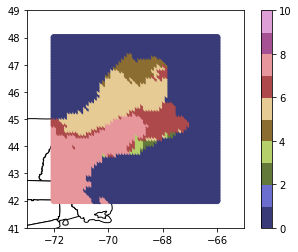

In [161]:
# Plot final_gdf, where 'present' column now represents total number of species at each point in grid.
fig, ax = plt.subplots()
ax.set(xlim=(-73,-65), ylim=(41,49)) 
us.plot(figsize=(10,8), ax=ax, color='white', edgecolor='black')
final_gdf.plot(column='present', ax=ax, cmap=plt.cm.get_cmap('tab20b', 10), legend=True, 
                       vmin=0, vmax=10)